Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

Load the datasets and then plot it for our better understanding!

Total examples in our dataset are 100
Total features in our dataset are 2
Total +ve examples in our dataset are 60
Total -ve examples in our dataset are 40


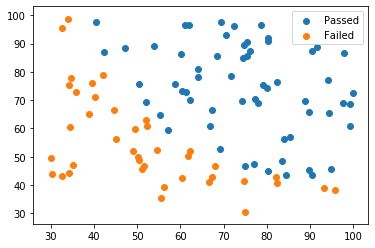

In [2]:
data = pd.read_csv("../data/marks.csv")
print('Total examples in our dataset are {}'.format(data.shape[0]))
print('Total features in our dataset are {}'.format(data.shape[1] -1 ))

X = data.iloc[:, :-1] #features are all but last column
Y = data.iloc[:, -1]   #last column
passed = data.loc[Y == 1]
failed = data.loc[Y == 0]

print('Total +ve examples in our dataset are {}'.format(passed.shape[0]))
print('Total -ve examples in our dataset are {}'.format(failed.shape[0]))

plt.scatter(passed.iloc[:, 0], passed.iloc[:, 1], label='Passed')
plt.scatter(failed.iloc[:, 0], failed.iloc[:, 1], label='Failed')
plt.legend()
plt.show()

In [3]:
#Logistic regression - basic definitions
def output(x, theta):
    return np.dot(x, theta)

def activationFunction(x):
    return 1/(1 + np.exp(-x)) #sigmoid

def costFunction( theta, x, y ):
    m = x.shape[0] #total examples
    yPredicted = activationFunction( output(x, theta ) )
    totalCost = (-1/m)* np.sum( np.multiply(y,np.log(yPredicted)) + np.multiply((1-y), np.log(1-yPredicted) ))
    return totalCost

def gradient( theta, x, y):
    m = x.shape[0] #total examples
    diff = activationFunction( output(x, theta ) ) - y;
    return (1/m)*np.dot(x.T, diff)

In [4]:
X = data.iloc[:, :-1] #features are all but last column
Y = data.iloc[:, -1]   #last column

xTrain = np.c_[np.ones((X.shape[0], 1)), X]
yTrain = Y[:, np.newaxis]
theta = np.zeros((xTrain.shape[1],1)); #start at zero

theta = op.fmin_tnc(func=costFunction, x0=theta, fprime=gradient,args=(xTrain, yTrain.flatten()))[0]
print('Final total cost is {}'.format(costFunction(theta,xTrain,yTrain.flatten())));

Final total cost is 0.2034977015894743


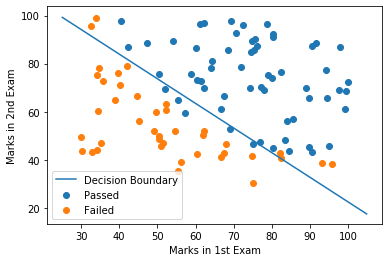

In [5]:
yPredicted = activationFunction( output(xTrain, theta ) );
yPredicted = yPredicted>=0.5; #find accuracy in there

x_values = [np.min(xTrain[:, 1] - 5), np.max(xTrain[:, 1]+ 5)]
y_values = -(theta[0] + np.multiply(theta[1], x_values)) / theta[2]

plt.scatter(passed.iloc[:, 0], passed.iloc[:, 1], label='Passed')
plt.scatter(failed.iloc[:, 0], failed.iloc[:, 1], label='Failed')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()